# Cycles

This notebook illustrates the search for [cycles](https://en.wikipedia.org/wiki/Cycle_(graph_theory)) in graphs.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import house, star, linear_digraph, cyclic_digraph
from sknetwork.topology import is_acyclic, get_cycles, break_cycles_from_root
from sknetwork.visualization import svg_graph
from scipy import sparse

## Graphs

In [4]:
# star
graph = star(5, metadata=True)
adjacency = graph.adjacency
position = graph.position

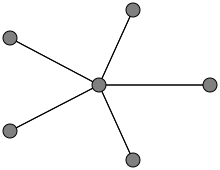

In [5]:
image = svg_graph(adjacency, position, scale=0.5)
SVG(image)

In [6]:
is_acyclic(adjacency)

True

In [7]:
# house graph
graph = house(metadata=True)
adjacency = graph.adjacency
position = graph.position

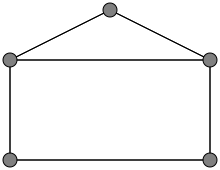

In [8]:
image = svg_graph(adjacency, position, scale=0.5)
SVG(image)

In [9]:
is_acyclic(adjacency)

False

## Directed graphs

In [10]:
# line
graph = linear_digraph(3, metadata=True)
adjacency = graph.adjacency
position = graph.position

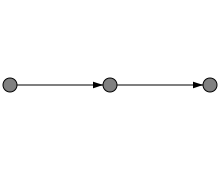

In [11]:
image = svg_graph(adjacency, position, scale=0.5)
SVG(image)

In [12]:
is_acyclic(adjacency)

True

In [13]:
# cycle
graph = cyclic_digraph(5, metadata=True)
adjacency = graph.adjacency
position = graph.position

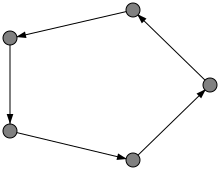

In [14]:
image = svg_graph(adjacency, position, scale=0.5)
SVG(image)

In [15]:
is_acyclic(adjacency)

False

### Detect and break cycles

In [16]:
# cycle tree
rows = [0, 0, 1, 1, 2, 2, 6, 6, 3, 8]
cols = [1, 2, 3, 4, 5, 6, 7, 8, 1, 2]
data = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
cycle_tree = sparse.csr_matrix((data, (rows, cols)), shape=(9, 9))

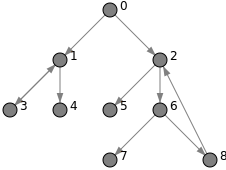

In [17]:
position = np.array([[3, 6], [2, 5], [4, 5], [1, 4], [2, 4], [3, 4], [4, 4], [3, 3], [5, 3]])
image = svg_graph(cycle_tree, position, scale=0.5, names=list(range(9)))
SVG(image)

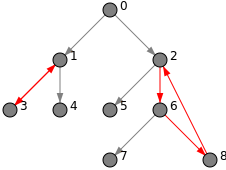

In [19]:
n_cycles, cycles = get_cycles(cycle_tree, directed=True)
edge_labels = [(cycle[i], cycle[i+1], 1) for cycle in cycles for i in range(len(cycle) - 1)] + [(cycle[-1], cycle[0], 1) for cycle in cycles]
image = svg_graph(cycle_tree, position, scale=0.5, edge_labels=edge_labels, names=list(range(9)))
SVG(image)

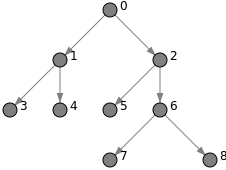

In [20]:
dag = break_cycles_from_root(cycle_tree, root=0, directed=True)
image = svg_graph(dag, position, scale=0.5, names=list(range(9)))
SVG(image)